# HR Analytics - Capstone Project 

HR Analysis is predictive analysis to identifying the employees most likely to get promoted.

HR Process:
First identify a set of employees based on recommendations/ past performance. Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical. At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs help to identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

This dataset contains 'employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted'  

The dataset has 14 features, 54808 observations.


In [1]:
# import libraries
import pandas as pd
import numpy as np

In [5]:
train = pd.read_csv("hr_train.csv")
test = pd.read_csv("hr_test.csv")

In [6]:
train.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


In [7]:
test.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47


In [8]:
train.shape

(54808, 14)

In [9]:
test.shape

(23490, 13)

In [10]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [11]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [12]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [13]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [15]:
train.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [16]:
train['education'].fillna("Bachelor's", inplace=True)
test['education'].fillna("Bachelor's", inplace=True)

In [17]:
train['previous_year_rating'].skew()

-0.3106378431385327

In [18]:
train['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [19]:
train['previous_year_rating'].fillna(train['previous_year_rating'].median(), inplace=True)
test['previous_year_rating'].fillna(test['previous_year_rating'].median(), inplace=True)

In [20]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [21]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [24]:
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])
train['education'] = le.fit_transform(train['education'])
test['education'] = le.fit_transform(test['education'])
train['recruitment_channel'] = le.fit_transform(train['recruitment_channel'])
test['recruitment_channel'] = le.fit_transform(test['recruitment_channel'])

In [25]:
train.drop(labels='employee_id',axis=1,inplace=True)
train.drop(labels='region',axis=1,inplace=True)
test.drop(labels='region',axis=1,inplace=True)

In [26]:
train.head(3)

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,2,0,2,1,35,5.0,8,1,0,49,0
1,4,0,1,0,1,30,5.0,4,0,0,60,0
2,7,0,1,2,1,34,3.0,7,0,0,50,0


In [27]:
train.columns

Index(['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [28]:
rel_feat =['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score']

In [29]:
rel_feat_corr = train.corr()['is_promoted'][['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score']]

In [30]:
rel_feat_corr

department              0.000130
education               0.029257
gender                 -0.011109
recruitment_channel     0.002229
no_of_trainings        -0.024896
age                    -0.017166
previous_year_rating    0.153230
length_of_service      -0.010670
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
Name: is_promoted, dtype: float64

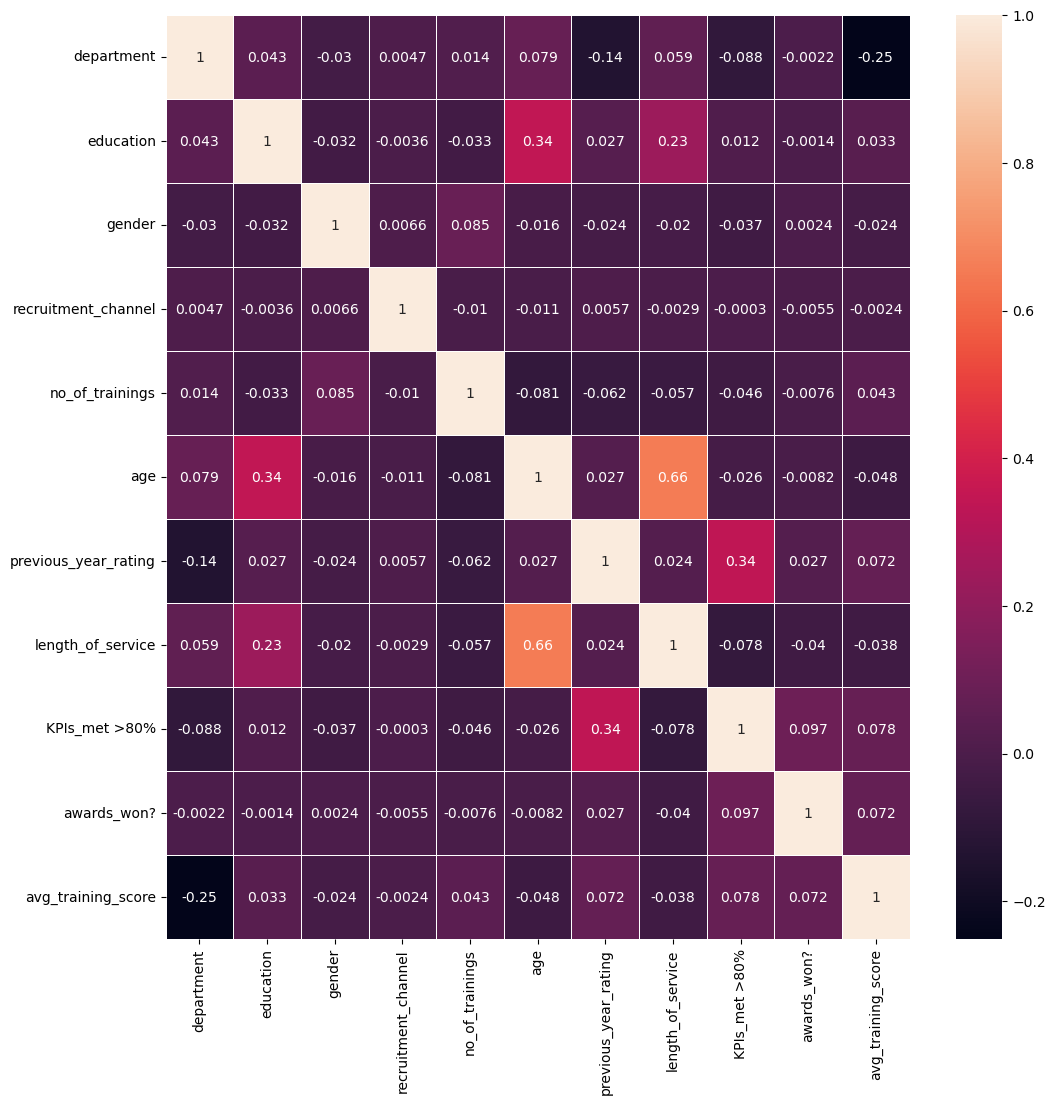

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize = (12,12))
sns.heatmap(train[rel_feat].corr(),annot = True, linewidths = 0.5);

In [32]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [33]:
X= train[rel_feat]
y= train['is_promoted']

In [34]:
#!pip install imblearn

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, \
                                                    stratify=y) # stratify - suffling

In [36]:
train_test_split?

In [32]:
y_train.value_counts()

0    37605
1     3501
Name: is_promoted, dtype: int64

In [37]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
np.bincount(y_train)

array([37605, 37605], dtype=int64)

# Random Forest

In [38]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

parameters = {'bootstrap': False,
              'min_samples_leaf': 3,
              'n_estimators':500,      
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 10,
             }

#Create a random forest classifier, 100 trees
clf_rf=RandomForestClassifier(**parameters)

#Train the model using the training sets
clf_rf.fit(X_train,y_train)

rf_pred=clf_rf.predict(X_test).astype(int)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, \
accuracy_score,recall_score

print(confusion_matrix(y_test,rf_pred))  
print(classification_report(y_test,rf_pred))  
print("Accuracy:",accuracy_score(y_test, rf_pred))

[[9966 2569]
 [ 360  807]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.87     12535
           1       0.24      0.69      0.36      1167

    accuracy                           0.79     13702
   macro avg       0.60      0.74      0.61     13702
weighted avg       0.90      0.79      0.83     13702

Accuracy: 0.7862355860458328


In [37]:
recall_score(y_test, rf_pred)

0.6829477292202228

In [40]:
rf_pred = clf_rf.predict(test[rel_feat]).astype(int)
sub = pd.DataFrame()
sub['employee_id'] = test['employee_id']
sub['is_promoted'] = rf_pred
sub[['employee_id','is_promoted']].to_csv('submission_rf.csv',index=False)

In [41]:
sub.head()

,employee_id,is_promoted
0,8724,1
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [40]:
sub.shape

(23490, 2)

In [42]:
sub.is_promoted.value_counts()

0    17785
1     5705
Name: is_promoted, dtype: int64

# XGBoost

In [43]:
from xgboost import plot_importance

In [44]:
# XGB Classifier
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(n_estimators=200,
 max_depth=10,
 min_child_weight=5,
 gamma=0,
 subsample=0.5,
 #colsample_bytree=0.3,
 objective= 'binary:logistic',
 nthread=5,
 scale_pos_weight=13,
 reg_lambda=5,
 alpha=5,
 base_score=0.15,
 #seed=1029,
 random_state=45)

clf_xgb.fit(X_train, y_train)

XGBClassifier(alpha=5, base_score=0.15, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, nthread=5, num_parallel_tree=None, ...)

In [45]:
# Predicting the Test set results
xg_pred = clf_xgb.predict(X_test).astype(int)

In [46]:
# evaluate predictions
print(confusion_matrix(y_test,xg_pred))  
print(classification_report(y_test,xg_pred))  
print("Accuracy:",accuracy_score(y_test, xg_pred))

[[10303  2232]
 [  361   806]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     12535
           1       0.27      0.69      0.38      1167

    accuracy                           0.81     13702
   macro avg       0.62      0.76      0.64     13702
weighted avg       0.91      0.81      0.85     13702

Accuracy: 0.8107575536418041


In [47]:
recall_score(y_test, xg_pred)

0.6906598114824336

In [46]:
xgb_pred = clf_xgb.predict(test[rel_feat]).astype(int)
sub = pd.DataFrame()
sub['employee_id'] = test['employee_id']
sub['is_promoted'] = xgb_pred
sub[['employee_id','is_promoted']].to_csv('submission_xgb.csv',index=False)

In [47]:
sub.is_promoted.value_counts()

0    18367
1     5123
Name: is_promoted, dtype: int64

In [ ]:
XGBClassifier?

# GBM

In [ ]:
from sklearn import ensemble
gbm = ensemble.GradientBoostingClassifier(n_estimators = 500, max_depth = 10, min_samples_split = 10, learning_rate = 0.1)
gbm.fit(X_train,y_train)

In [ ]:
gbm_pred = gbm.predict(X_test)

In [ ]:
# evaluate predictions
print(confusion_matrix(y_test,gbm_pred))  
print(classification_report(y_test,gbm_pred))  
print("Accuracy:",accuracy_score(y_test, gbm_pred))

In [ ]:
recall_score(y_test, gbm_pred)

In [ ]:
gbm_pred = gbm.predict(test[rel_feat]).astype(int)
sub = pd.DataFrame()
sub['employee_id'] = test['employee_id']
sub['is_promoted'] = gbm_pred
sub[['employee_id','is_promoted']].to_csv('submission_gbm.csv',index=False)

In [ ]:
sub.is_promoted.value_counts()